In [1]:
import numpy as np 
import keras 
keras.__version__ 
import tensorflow 
from tensorflow.keras.applications.resnet50 import ResNet50 
#from tf.keras.applications.resnet50 import ResNet50 

In [2]:
import os
data_folder_path = 'G:\Mi unidad\Demat\8 semestre\ML\Tarea 4\Datos\kaggle_3m'
data_folders = os.listdir(data_folder_path)  # leo las carpetas de los datos.

data_folders.remove('data.csv')  # Quitamos lo que son datos 
data_folders.remove('README.md')

In [3]:
len(data_folders)

110

In [4]:
#os.mkdir('imagenes') #creo las carpetas imagenes y masks 
#os.mkdir('mascaras')

In [5]:
images_folder = './imagenes/'
masks_folder = './mascaras/'

In [6]:
import PIL
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image 


def read_and_save_images():
  c=0
  for folder in data_folders: #get each single folder
    files = os.listdir(data_folder_path+'/'+folder) #list all the files and masks in that folder
    for i in range(1, len(files)//2): #get single file
      img=Image.open(data_folder_path+'/'+folder+'/'+folder+'_'+str(i)+'.tif')
      img.save(images_folder+str(c)+'.tif')  
      mask=Image.open(data_folder_path+'/'+folder+'/'+folder+'_'+str(i)+'_mask.tif')  #TCGA_CS_4941_19960909_1_mask.tif
      mask.save(masks_folder+str(c)+'.tif')
      c += 1
      print(c)
    print(folder)
    
      

In [7]:
#read_and_save_images()

(-0.5, 255.5, 255.5, -0.5)

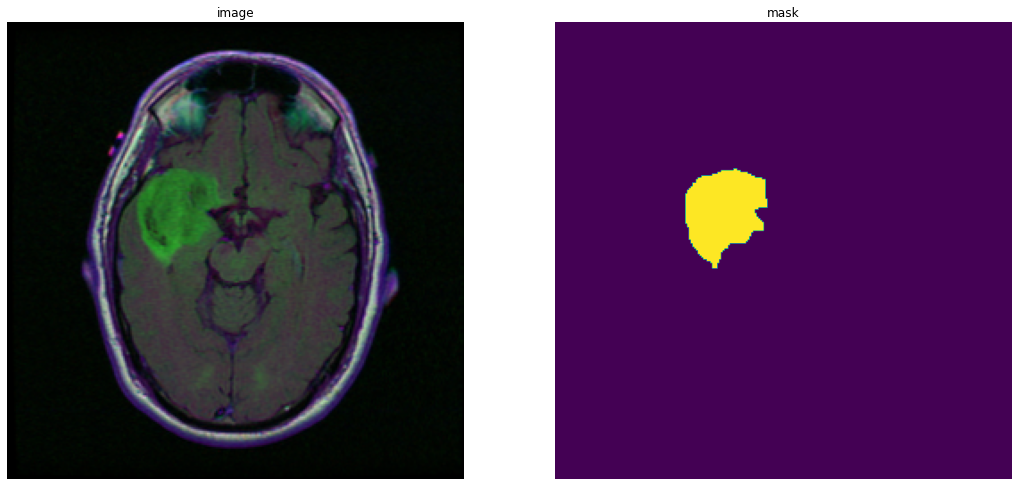

In [8]:
import random 
images = os.listdir(images_folder)
masks = os.listdir(masks_folder)
rand_index = random.randint(0, len(images))
img = plt.imread(images_folder+images[rand_index])
mask = plt.imread(masks_folder+masks[rand_index])
plt.figure(figsize=(18,18))
plt.subplot(121)
plt.imshow(img)
plt.title('image')
plt.axis('off')
plt.subplot(122)
plt.imshow(mask)
plt.title('mask')
plt.axis('off')

------------------------------

-----------

In [9]:
from sklearn.model_selection import train_test_split 
train_images, test_images, train_masks, test_masks = train_test_split(images, masks, test_size=0.2, random_state = 54)
print(f"train image length: {len(train_images)} \ntrain masks length: {len(train_masks)} \ntest images length: {len(test_images)} \ntest masks length: {len(test_masks)}")

train image length: 3055 
train masks length: 3055 
test images length: 764 
test masks length: 764


(256, 256, 3) (256, 256)


(-0.5, 255.5, 255.5, -0.5)

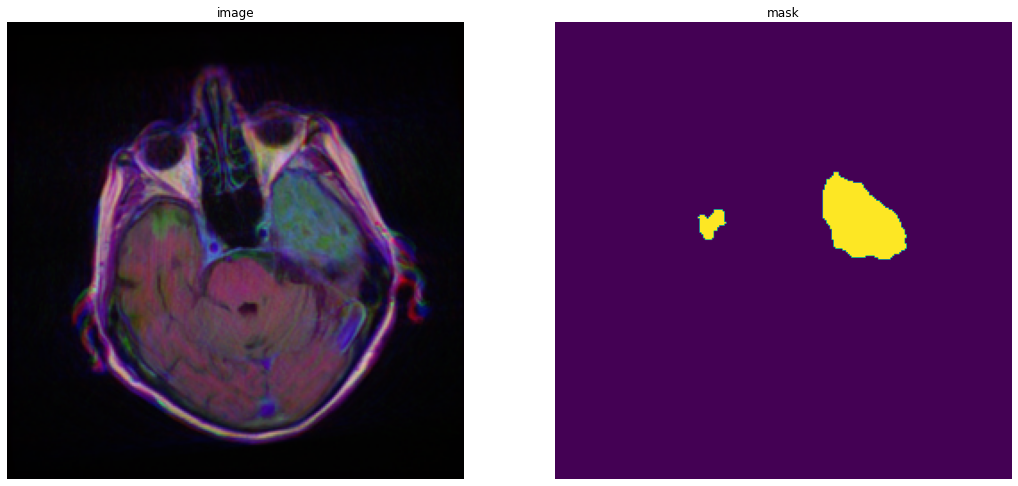

In [11]:
rand_index = random.randint(0, len(train_images))
img = plt.imread(images_folder+train_images[rand_index])
mask = plt.imread(masks_folder+train_masks[rand_index])
print(img.shape, mask.shape)
plt.figure(figsize=(18,18))
plt.subplot(121)
plt.imshow(img)
plt.title('image')
plt.axis('off')
plt.subplot(122)
plt.imshow(mask)
plt.title('mask')
plt.axis('off')

In [12]:
# creo los directorios de los datos de entrenamiento y prueba
''' 
if not os.path.exists("./Data/"):
  os.mkdir("./Data/")
if not os.path.exists("./Data/train_images/"):
  os.mkdir("./Data/train_images/")
if not os.path.exists("./Data/val_images/"):
  os.mkdir("./Data/val_images/")
if not os.path.exists("./Data/val_masks/"):
  os.mkdir("./Data/val_masks/")
if not os.path.exists("./Data/train_masks/"):
  os.mkdir("./Data/train_masks/")
'''

' \nif not os.path.exists("./Data/"):\n  os.mkdir("./Data/")\nif not os.path.exists("./Data/train_images/"):\n  os.mkdir("./Data/train_images/")\nif not os.path.exists("./Data/val_images/"):\n  os.mkdir("./Data/val_images/")\nif not os.path.exists("./Data/val_masks/"):\n  os.mkdir("./Data/val_masks/")\nif not os.path.exists("./Data/train_masks/"):\n  os.mkdir("./Data/train_masks/")\n'

In [13]:

'''
if not os.path.exists("Data/train_images/train"):
  os.mkdir("Data/train_images/train")
if not os.path.exists("Data/val_images/val"):
  os.mkdir("Data/val_images/val")
if not os.path.exists("Data/val_masks/val"):
  os.mkdir("Data/val_masks/val")
if not os.path.exists("Data/train_masks/train"):
  os.mkdir("Data/train_masks/train")
'''

'\nif not os.path.exists("Data/train_images/train"):\n  os.mkdir("Data/train_images/train")\nif not os.path.exists("Data/val_images/val"):\n  os.mkdir("Data/val_images/val")\nif not os.path.exists("Data/val_masks/val"):\n  os.mkdir("Data/val_masks/val")\nif not os.path.exists("Data/train_masks/train"):\n  os.mkdir("Data/train_masks/train")\n'

In [14]:
train_images_path = './Data/train_images/train/'
train_masks_path = './Data/train_masks/train/'
val_images_path = './Data/val_images/val/'
val_masks_path = './Data/val_masks/val/'

In [15]:

#save images and masks in folders
'''
for x in train_images:
  img = Image.open(images_folder+x)
  img.save(train_images_path+x)
  mask = Image.open(masks_folder+x)
  mask.save(train_masks_path+x)
'''

'\nfor x in train_images:\n  img = Image.open(images_folder+x)\n  img.save(train_images_path+x)\n  mask = Image.open(masks_folder+x)\n  mask.save(train_masks_path+x)\n'

In [16]:
'''
for x in test_images:
  img = Image.open(images_folder+x)
  img.save(val_images_path+x)
  mask = Image.open(masks_folder+x)
  mask.save(val_masks_path+x)
'''

'\nfor x in test_images:\n  img = Image.open(images_folder+x)\n  img.save(val_images_path+x)\n  mask = Image.open(masks_folder+x)\n  mask.save(val_masks_path+x)\n'

In [17]:
train_i = os.listdir(train_images_path)
train_m = os.listdir(train_masks_path)
val_i = os.listdir(val_images_path)
val_m = os.listdir(val_masks_path)
len(train_i), len(train_m), len(val_i), len(val_m)

(3055, 3055, 764, 764)

In [18]:
train_images_path = './Data/train_images/'
train_masks_path = './Data/train_masks/'
val_images_path = './Data/val_images/'
val_masks_path = './Data/val_masks/'

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
tf.random.set_seed(54)
img_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect')
mask_data_gen_args = dict(rotation_range=90,
                     width_shift_range=0.3,
                     height_shift_range=0.3,
                     shear_range=0.5,
                     zoom_range=0.3,
                     horizontal_flip=True,
                     vertical_flip=True,
                     fill_mode='reflect',
                     preprocessing_function = lambda x: np.where(x>0, 1, 0).astype(x.dtype))

In [20]:
#create dataset 
#for training
image_data_generator = ImageDataGenerator(**img_data_gen_args, rescale=1.0/255.0)
train_image_generator = image_data_generator.flow_from_directory(train_images_path,
                                                           batch_size=4,
                                                           class_mode=None,
                                                           seed=54)
masks_data_generator = ImageDataGenerator(**mask_data_gen_args)
train_mask_generator = masks_data_generator.flow_from_directory(train_masks_path,
                                                                class_mode=None,
                                                                seed=54,
                                                                batch_size=4)
#for validation
image_data_generator = ImageDataGenerator(rescale=1.0/255.0)
test_image_generator=image_data_generator.flow_from_directory(val_images_path,
                                                              batch_size=4,
                                                              seed=54,
                                                              class_mode=None)
test_masks_generator = image_data_generator.flow_from_directory(val_masks_path,
                                                                batch_size=4,
                                                                seed=54,
                                                                class_mode=None) 

Found 3055 images belonging to 1 classes.
Found 3055 images belonging to 1 classes.
Found 764 images belonging to 1 classes.
Found 764 images belonging to 1 classes.


In [21]:
#create a function
import numpy as np
def image_mask_generator(image_generator, mask_generator):
  train_generator = zip(image_generator, mask_generator)
  for (img, mask) in train_generator:
    mask=mask[:,:,:,0]
    mask=np.expand_dims(mask, axis=3)
    yield (img, mask) 

In [22]:
train_datagen = image_mask_generator(train_image_generator, train_mask_generator)
test_datagen  = image_mask_generator(test_image_generator, test_masks_generator)

(256, 256, 3) (256, 256, 1)


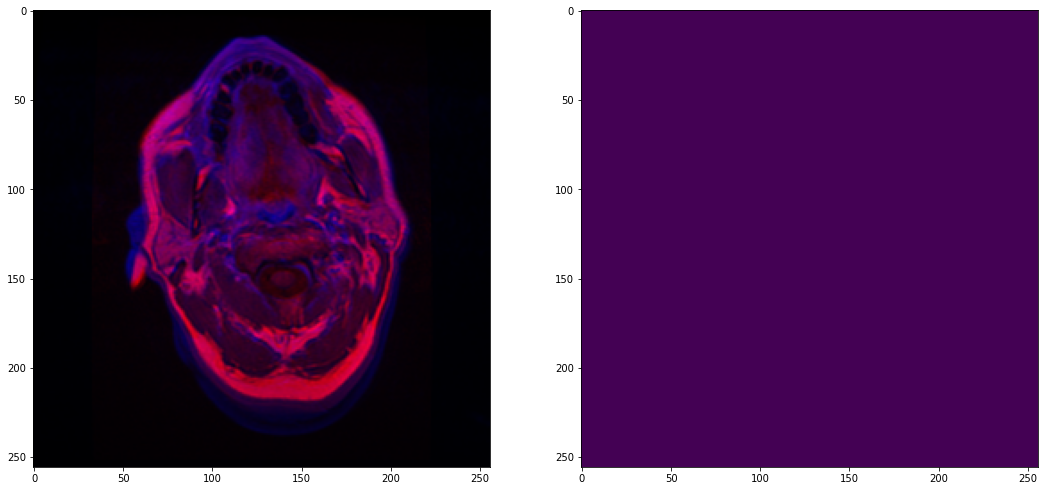

In [23]:
import matplotlib.pyplot as plt
#x, y = train_datagen.__next__()
x, y = test_datagen.__next__()
plt.figure(figsize=(18,18))
for i in range(0,1):
    image = x[i]
    mask = y[i]
    print(image.shape, mask.shape)
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.imshow(mask[:,:,0])
    plt.show()

---------------------------

In [24]:
image.max(), mask.max(), image.min(), mask.min(), image.shape, mask.shape 

(0.9725491, 0.0, 0.0, 0.0, (256, 256, 3), (256, 256, 1))

In [25]:
IMG_HEIGHT = image.shape[0]
IMG_WIDTH  = image.shape[1] 
IMG_CHANNELS = image.shape[2] 
IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS #Dimenciones de los datos. 

(256, 256, 3)

In [26]:
# para no sobre ajustar el modelo 
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="accuracy",
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True  
)


from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.metrics import MeanIoU

kernel_initializer =  'he_uniform'  # also try 'he_normal' but model not converging... 


-------------------------------

MODELO DE EJEMPLO

------------------------

In [27]:

################################################################
def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
#Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c8)
     
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer=kernel_initializer, padding='same')(c9)
     
    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)
     
    model = Model(inputs=[inputs], outputs=[outputs])
    model.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
    #model.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy', metrics=[MeanIoU(num_classes=2)])
    model.summary()
    
    return model


In [28]:
def get_model():
    return simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS)
model_ejemplo = get_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [28]:
model_ejemplo.save('G:/Mi unidad/Demat/8 semestre/ML/Tarea 3/EJEMPLO.h5')   # Gardo mi modelo entrenado  

In [29]:
import os
num_imges=len(os.listdir(train_images_path+"train/"))
num_vals=len(os.listdir(val_images_path+"val/"))

steps_per_epoch=num_imges//16
validation_steps=int(0.1 * num_vals//16)
steps_per_epoch, validation_steps 

(190, 4)

In [31]:
#Fit the model
history = model_ejemplo.fit(train_datagen, validation_data=test_datagen, steps_per_epoch=steps_per_epoch, validation_steps=steps_per_epoch, epochs = 15,
                    callbacks=early_stopping) 
model_ejemplo.save('G:/Mi unidad/Demat/8 semestre/ML/Tarea 3/EJEMPLO_fit.h5')   # Gardo mi modelo entrenado  


Epoch 1/15
190/190 [==============================] - 351s 2s/step - loss: 0.0865 - accuracy: 0.9881 - val_loss: 0.0322 - val_accuracy: 0.9897
Epoch 2/15
190/190 [==============================] - 355s 2s/step - loss: 0.0392 - accuracy: 0.9880 - val_loss: 0.0288 - val_accuracy: 0.9901
Epoch 3/15
190/190 [==============================] - 344s 2s/step - loss: 0.0417 - accuracy: 0.9875 - val_loss: 0.0326 - val_accuracy: 0.9909
Epoch 4/15
190/190 [==============================] - 353s 2s/step - loss: 0.0364 - accuracy: 0.9895 - val_loss: 0.0255 - val_accuracy: 0.9926
Epoch 5/15
190/190 [==============================] - 356s 2s/step - loss: 0.0344 - accuracy: 0.9901 - val_loss: 0.0267 - val_accuracy: 0.9923
Epoch 6/15
190/190 [==============================] - 346s 2s/step - loss: 0.0317 - accuracy: 0.9910 - val_loss: 0.0262 - val_accuracy: 0.9921
Epoch 7/15
190/190 [==============================] - 347s 2s/step - loss: 0.0334 - accuracy: 0.9907 - val_loss: 0.0248 - val_accuracy: 0.9927

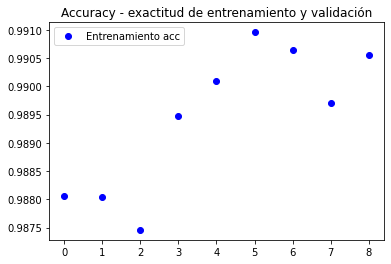

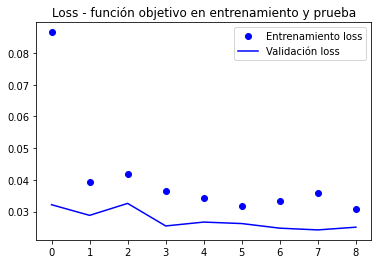

In [32]:
import matplotlib.pyplot as plt 

#1850

acc      = history.history['accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.title('Accuracy - exactitud de entrenamiento y validación')
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Loss - función objetivo en entrenamiento y prueba')
plt.legend()

plt.show()

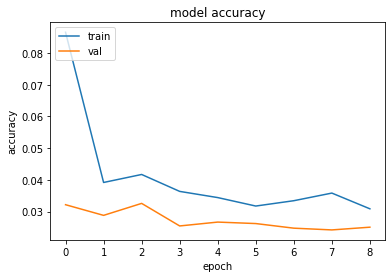

In [33]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [30]:
model_ejemplo  = keras.models.load_model('G:/Mi unidad/Demat/8 semestre/ML/Tarea 3/EJEMPLO_fit.h5')

In [33]:
model_ejemplo.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])


c:\Users\ASUS\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


(256, 256, 1)
(1, 256, 256, 3)
(256, 256, 1)


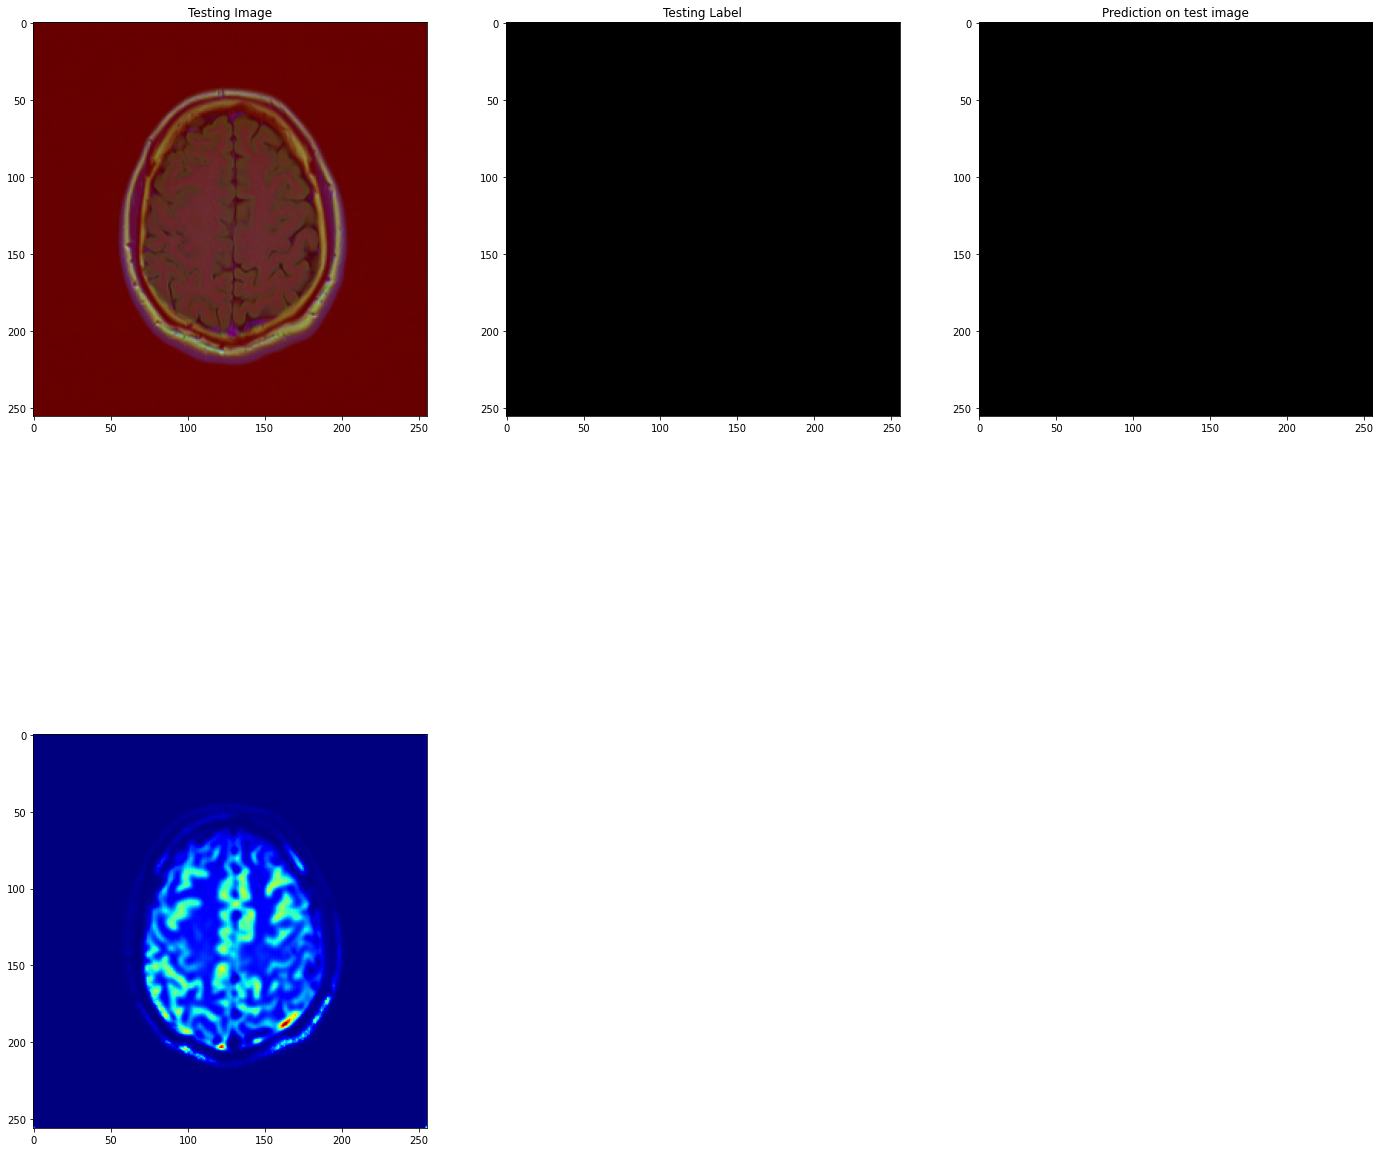

In [41]:
#making predictions
threshold = 0.5
#test_img_number = random.randint(0, num_vals-1)
x, y=test_datagen.__next__()
for i in range(0,1):
  test_img=x[i]
  ground_truth=y[i]
  print(ground_truth.shape)

# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model_ejemplo.predict(test_img_input)[0,:,:,:] > 0.2).astype(np.uint8)
#prediction = (model.predict(test_img_input)[0,:,:,:])
print(prediction.shape)

plt.figure(figsize=(24, 24))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,:])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction[:,:,0], cmap='gray')
plt.subplot(234)

img = np.array(model_ejemplo.predict(test_img_input)[0,:,:,:] )

plt.imshow(img, 'jet') 
plt.show()

El modelo del ejemplo tiene un buen desempeño aun que en algunos casos no segmenta todo el tumor.

--------------------------

MI MODELO
Intent implementar un modelo tratando de colar un decoder despues de la MobileNetV2 y un clasificador aprecido al del ejemplo despues del encode, pero no funciono.

------------------

In [29]:
IMG_SHAPE = (IMG_WIDTH, IMG_HEIGHT, IMG_CHANNELS)

# Create the base model from the pre-trained model MobileNet V2
all_model = None
all_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE, 
                                               include_top=False, 
                                               weights='imagenet')
                          

lo intent con la funcion de activation linear y relu

In [251]:
from keras import models
model = None
#model = models.Sequential() 

c1 = None
c1 = layers.Conv2DTranspose(1280, (1, 1), strides=2, activation="linear", padding="same")(all_model.output)
c1 = layers.Conv2DTranspose(320, (1, 1), strides=2, activation="linear", padding="same")(c1)
#c1 = layers.Conv2DTranspose(960, (1, 1), strides=2, activation="linear", padding="same")(c1)
#c1 = layers.Conv2DTranspose(160, (1, 1), strides=2, activation="linear", padding="same")(c1)
c1 = layers.Conv2DTranspose(144, (1, 1), strides=2, activation="linear", padding="same")(c1) 
#c1 = layers.Conv2DTranspose(24, (1, 1), strides=2, activation="linear", padding="same")(c1)
c1 = layers.Conv2DTranspose(24, (1, 1), strides=2, activation="linear", padding="same")(c1)
#c1 = layers.Conv2DTranspose(92, (1, 1), strides=2, activation="linear", padding="same")(c1)
#c1 = layers.Conv2DTranspose(16, (1, 1), strides=2, activation="linear", padding="same")(c1)
c1 = layers.Conv2DTranspose(32, (3, 3), strides=2, activation="linear", padding="same")(c1)
c1 = layers.Conv2D(1, (3, 3), activation="linear", padding="same")(c1)



c1 = Conv2D(16, (2, 2), activation='linear', kernel_initializer=kernel_initializer, padding='same')(c1)
c1 = (Dropout(0.1))(c1)
c1 = Conv2D(16, (3, 3), activation='linear', kernel_initializer=kernel_initializer, padding='same')(c1)
c1 = Conv2D(1, (1, 1), activation='linear', kernel_initializer=kernel_initializer, padding='same')(c1)

model = tf.keras.Model(inputs=all_model.input, outputs=c1)
#all_model.trainable= False
model.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
#model.output  

# INTENTE IMPLEMENTAR UN DECODE PERO NO ME FUNCIONO :c 


In [175]:
history = model.fit(train_datagen, validation_data=test_datagen, steps_per_epoch=steps_per_epoch, validation_steps=steps_per_epoch, epochs=1,
                    )  
model.save('G:/Mi unidad/Demat/8 semestre/ML/Tarea 4/modelo_base_decode_clas_linear.h5')   # Gardo mi modelo entrenado                     

190/190 [==============================] - 433s 2s/step - loss: 0.0972 - accuracy: 0.9807 - val_loss: 0.0364 - val_accuracy: 0.9903


----------------------------

Red base fija 
------------------------------
-----------------------------

In [28]:
model_pix2pix  = keras.models.load_model('G:/Mi unidad/Demat/8 semestre/ML/Tarea 4/Modelos/pix2pix_fit_red_base_fija_fit.h5')
model_pix2pix.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
#model.output   
model_pix2pix.summary() 

Model: "model_17"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_9 (Functional)           [(None, 128, 128, 9  1841984     ['input_16[0][0]']               
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                        

-----------------------------------------

In [189]:
import os
num_imges=len(os.listdir(train_images_path+"train/"))
num_vals=len(os.listdir(val_images_path+"val/"))

steps_per_epoch=num_imges//16
validation_steps=int(0.1 * num_vals//16)
steps_per_epoch, validation_steps 

history = model_pix2pix.fit(train_datagen, validation_data=test_datagen, steps_per_epoch=steps_per_epoch, validation_steps=steps_per_epoch, epochs=15,)   
model_pix2pix.save('G:/Mi unidad/Demat/8 semestre/ML/Tarea 4/Modelos/pix2pix_red_base_fija_fit2.h5')   # Gardo mi modelo entrenado 

Epoch 1/15
190/190 [==============================] - 211s 1s/step - loss: 0.0463 - accuracy: 0.9876 - val_loss: 0.0404 - val_accuracy: 0.9889
Epoch 2/15
190/190 [==============================] - 209s 1s/step - loss: 0.0450 - accuracy: 0.9872 - val_loss: 0.0288 - val_accuracy: 0.9908
Epoch 3/15
190/190 [==============================] - 213s 1s/step - loss: 0.0406 - accuracy: 0.9880 - val_loss: 0.0376 - val_accuracy: 0.9894
Epoch 4/15
190/190 [==============================] - 187s 988ms/step - loss: 0.0430 - accuracy: 0.9872 - val_loss: 0.0316 - val_accuracy: 0.9894
Epoch 5/15
190/190 [==============================] - 172s 902ms/step - loss: 0.0407 - accuracy: 0.9881 - val_loss: 0.0328 - val_accuracy: 0.9902
Epoch 6/15
190/190 [==============================] - 192s 1s/step - loss: 0.0385 - accuracy: 0.9885 - val_loss: 0.0273 - val_accuracy: 0.9916
Epoch 7/15
190/190 [==============================] - 199s 1s/step - loss: 0.0355 - accuracy: 0.9893 - val_loss: 0.0286 - val_accuracy: 

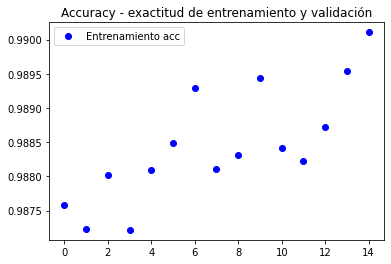

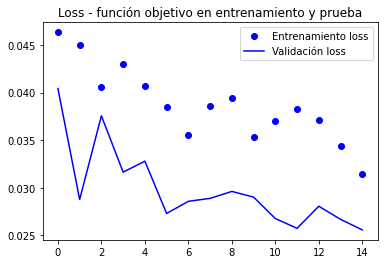

In [191]:
import matplotlib.pyplot as plt 

#1850

acc      = history.history['accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.title('Accuracy - exactitud de entrenamiento y validación')
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Loss - función objetivo en entrenamiento y prueba')
plt.legend()

plt.show()

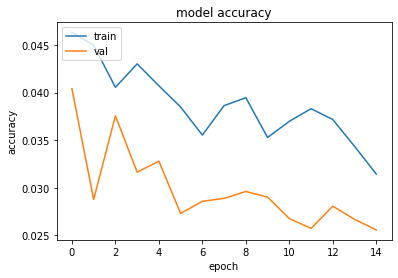

In [192]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

(256, 256, 1)
(1, 256, 256, 3)
(256, 256, 1)


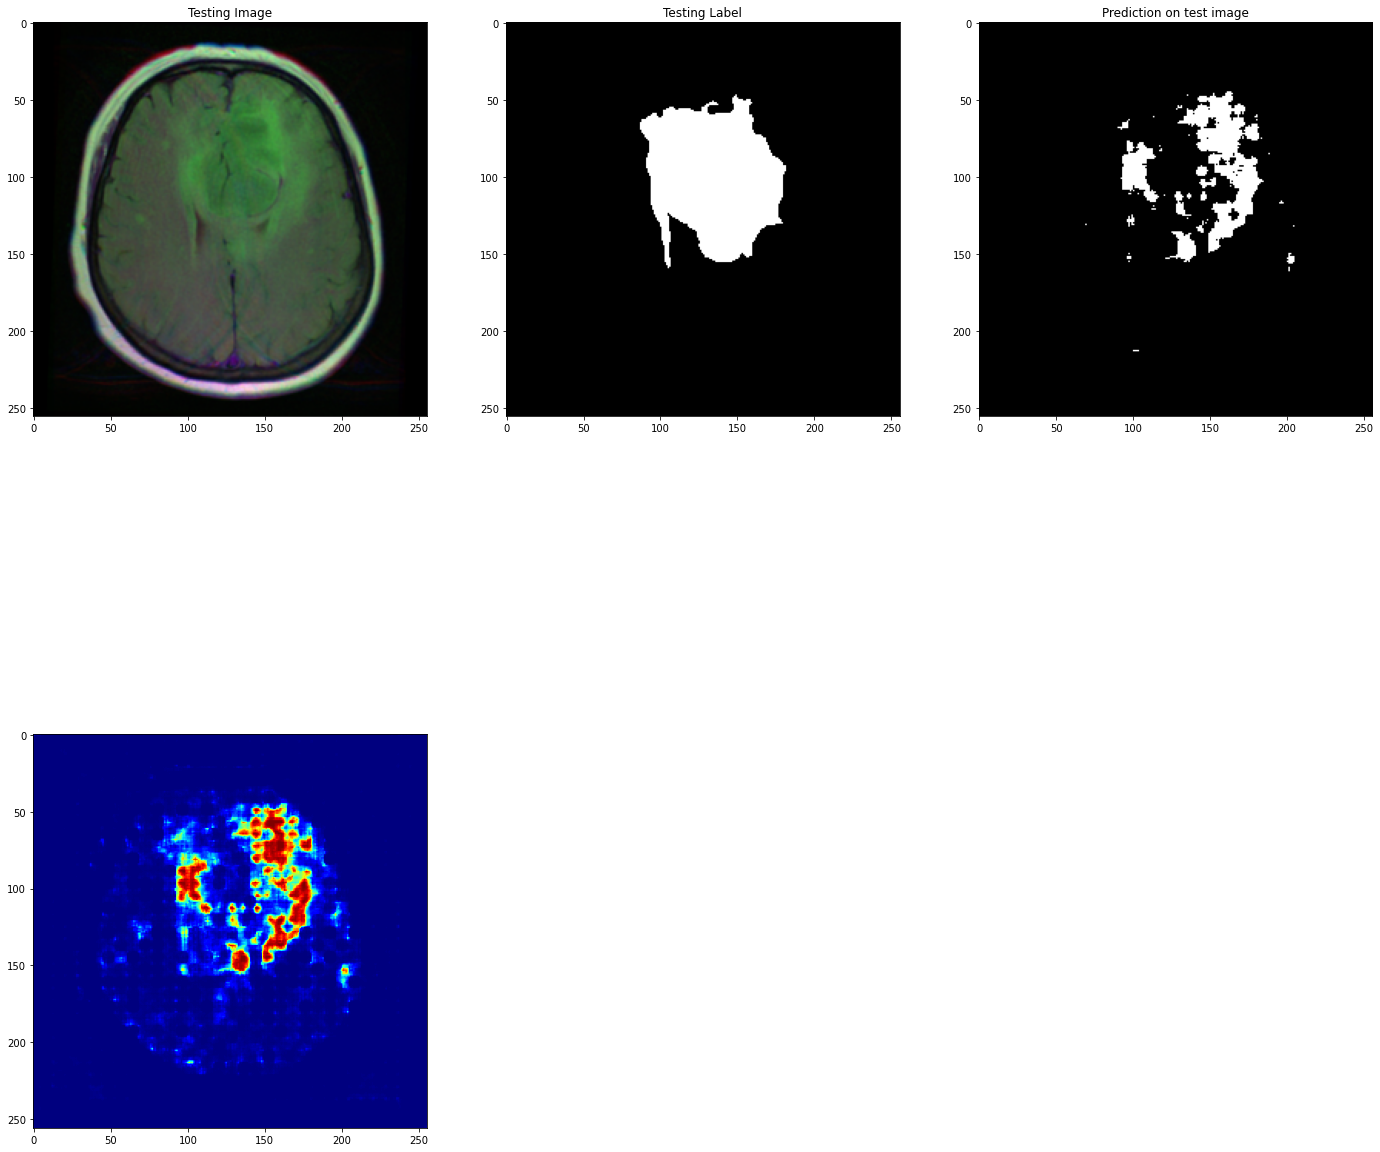

In [239]:
#making predictions
threshold = 0.5
#test_img_number = random.randint(0, num_vals-1)
x, y=test_datagen.__next__()
for i in range(0,1):
  test_img=x[i]
  ground_truth=y[i]
  print(ground_truth.shape)

# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model_pix2pix2.predict(test_img_input)[0,:,:,:] > 0.3).astype(np.uint8)
#prediction = (model.predict(test_img_input)[0,:,:,:])
print(prediction.shape)

plt.figure(figsize=(24, 24))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,:])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction[:,:,0], cmap='gray')
plt.subplot(234)

img = np.array(model_pix2pix2.predict(test_img_input)[0,:,:,:] )

plt.imshow(img, 'jet') 
plt.show()

In [215]:
np.min(img)

5.326367e-13

Aun que la red detecta el tumor, no lo segmenta todo y tiene algunos guecos.

-------------------------------------
RED BASE SEMI LIBRE (fine tuning).

-------------------------------------

In [28]:
model_pix2pix_semi  = keras.models.load_model('G:/Mi unidad/Demat/8 semestre/ML/Tarea 4/Modelos/modelo_pix2pix3_semi_libre.h5')
model_pix2pix_semi.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
#model.output   
model_pix2pix_semi.summary() 

Model: "model_38"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_36 (Functional)          [(None, 128, 128, 9  1841984     ['input_39[0][0]']               
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                        

In [29]:
import os
num_imges=len(os.listdir(train_images_path+"train/"))
num_vals=len(os.listdir(val_images_path+"val/"))

steps_per_epoch=num_imges//16
validation_steps=int(0.1 * num_vals//16)
steps_per_epoch, validation_steps 

history_semi = model_pix2pix_semi.fit(train_datagen, validation_data=test_datagen, steps_per_epoch=steps_per_epoch, validation_steps=steps_per_epoch, epochs=15,
                    )   
model_pix2pix_semi.save('G:/Mi unidad/Demat/8 semestre/ML/Tarea 4/Modelos/pix2pix_red_base_semi_libre_fit.h5')   # Gardo mi modelo entrenado 

Epoch 1/15
190/190 [==============================] - 329s 2s/step - loss: 0.0465 - accuracy: 0.9880 - val_loss: 0.0521 - val_accuracy: 0.9897
Epoch 2/15
190/190 [==============================] - 316s 2s/step - loss: 0.0316 - accuracy: 0.9880 - val_loss: 0.0966 - val_accuracy: 0.9897
Epoch 3/15
190/190 [==============================] - 308s 2s/step - loss: 0.0309 - accuracy: 0.9899 - val_loss: 0.2764 - val_accuracy: 0.9566
Epoch 4/15
190/190 [==============================] - 300s 2s/step - loss: 0.0287 - accuracy: 0.9915 - val_loss: 0.1436 - val_accuracy: 0.9877
Epoch 5/15
190/190 [==============================] - 298s 2s/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0873 - val_accuracy: 0.9854
Epoch 6/15
190/190 [==============================] - 301s 2s/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.2218 - val_accuracy: 0.9692
Epoch 7/15
190/190 [==============================] - 299s 2s/step - loss: 0.0240 - accuracy: 0.9919 - val_loss: 0.0866 - val_accuracy: 0.9861

In [ ]:
import matplotlib.pyplot as plt 

#1850

acc      = history_semi.history['accuracy']
loss     = history_semi.history['loss']
val_loss = history_semi.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.title('Accuracy - exactitud de entrenamiento y validación')
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Loss - función objetivo en entrenamiento y prueba')
plt.legend()

plt.show()

(256, 256, 1)
(1, 256, 256, 3)
(256, 256, 1)


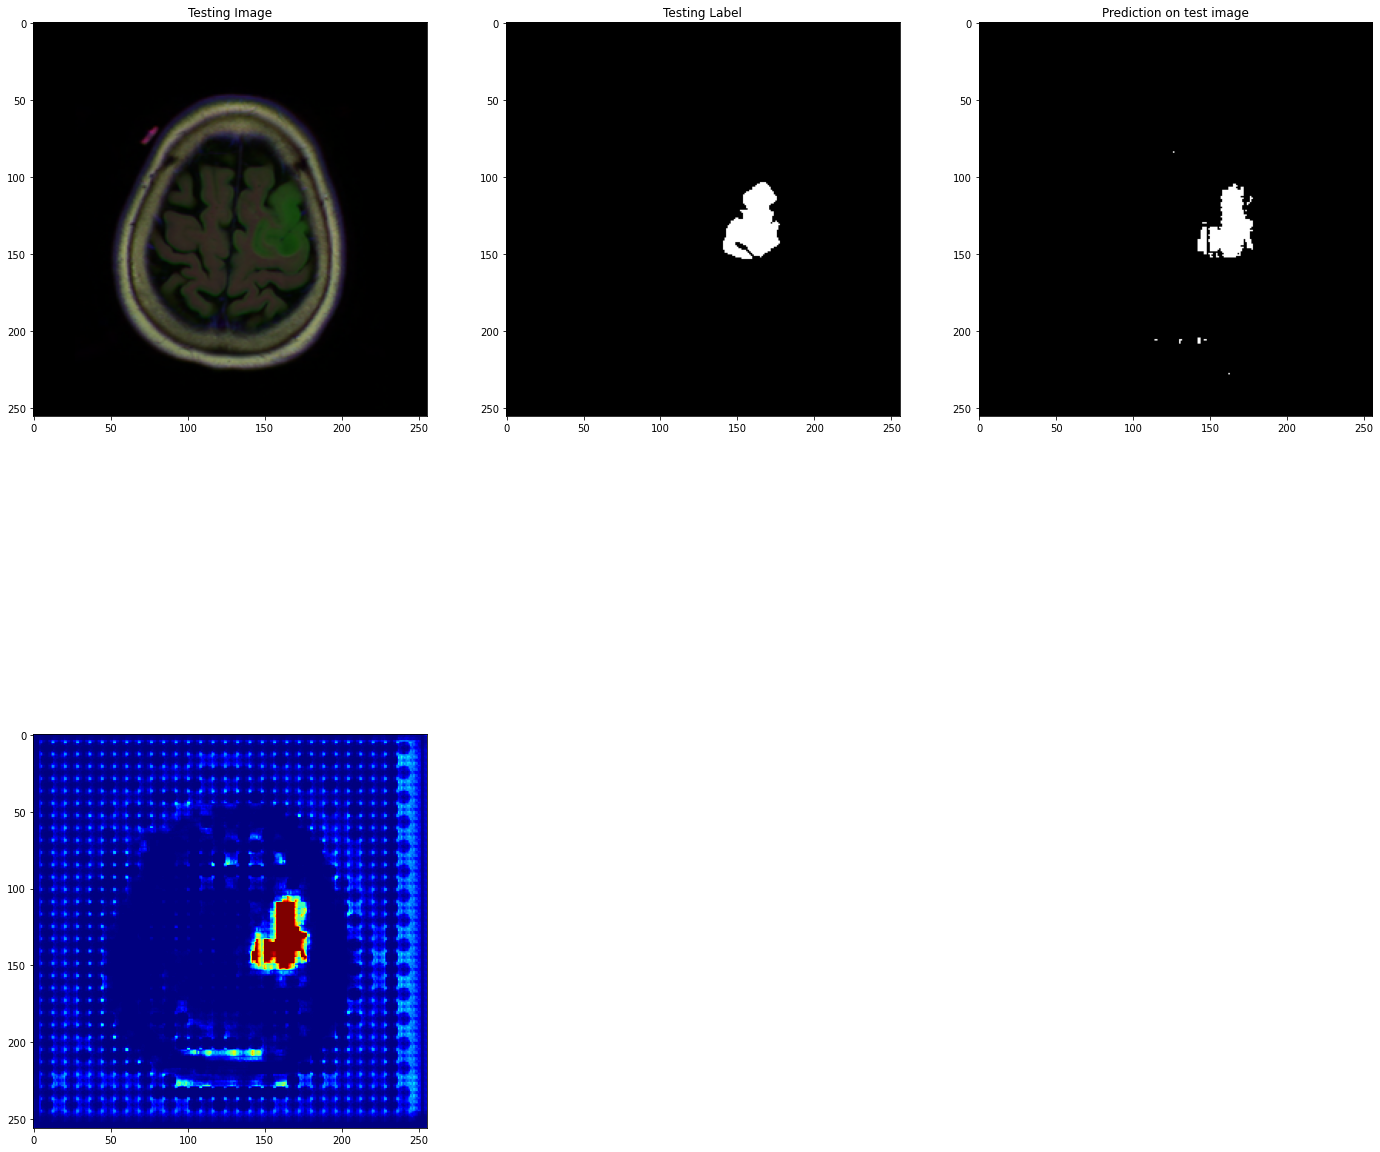

In [41]:
#making predictions
threshold = 0.5
#test_img_number = random.randint(0, num_vals-1)
x, y=test_datagen.__next__()
for i in range(0,1):
  test_img=x[i]
  ground_truth=y[i]
  print(ground_truth.shape)

# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model_pix2pix_semi.predict(test_img_input)[0,:,:,:] > 0.5).astype(np.uint8)
#prediction = (model.predict(test_img_input)[0,:,:,:])
print(prediction.shape)

plt.figure(figsize=(24, 24))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,:])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction[:,:,0], cmap='gray')
plt.subplot(234)

img = np.array(model_pix2pix_semi.predict(test_img_input)[0,:,:,:] )

plt.imshow(img, 'jet') 
plt.show()

Tiende a dar valores muy grandes en la mascara y por lo mismo suele dar faltos positivos.

FULL TUNING

In [42]:
model_pix2pix_FULL  = keras.models.load_model('G:/Mi unidad/Demat/8 semestre/ML/Tarea 4/Modelos/modelo_pix2pix3_Full.h5')
model_pix2pix_FULL.compile(optimizer=Adam(lr = 1e-3), loss='binary_crossentropy', metrics=['accuracy'])
#model.output   
model_pix2pix_FULL.summary() 

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_43 (InputLayer)          [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_43 (Functional)          [(None, 128, 128, 9  1841984     ['input_43[0][0]']               
                                6),                                                               
                                 (None, 64, 64, 144                                               
                                ),                                                                
                                 (None, 32, 32, 192                                        

In [43]:
import os
num_imges=len(os.listdir(train_images_path+"train/"))
num_vals=len(os.listdir(val_images_path+"val/"))

steps_per_epoch=num_imges//16
validation_steps=int(0.1 * num_vals//16)
steps_per_epoch, validation_steps 

history_FULL = model_pix2pix_FULL.fit(train_datagen, validation_data=test_datagen, steps_per_epoch=steps_per_epoch, validation_steps=steps_per_epoch, epochs=15,
                    )   
model_pix2pix_FULL.save('G:/Mi unidad/Demat/8 semestre/ML/Tarea 4/Modelos/pix2pix_FULL_fit.h5')   # Gardo mi modelo entrenado 

Epoch 1/15
190/190 [==============================] - 306s 2s/step - loss: 0.0457 - accuracy: 0.9862 - val_loss: 0.0472 - val_accuracy: 0.9897
Epoch 2/15
190/190 [==============================] - 301s 2s/step - loss: 0.0348 - accuracy: 0.9894 - val_loss: 0.2742 - val_accuracy: 0.9197
Epoch 3/15
190/190 [==============================] - 302s 2s/step - loss: 0.0295 - accuracy: 0.9908 - val_loss: 0.1739 - val_accuracy: 0.9635
Epoch 4/15
190/190 [==============================] - 301s 2s/step - loss: 0.0240 - accuracy: 0.9924 - val_loss: 0.1715 - val_accuracy: 0.9615
Epoch 5/15
190/190 [==============================] - 301s 2s/step - loss: 0.0234 - accuracy: 0.9926 - val_loss: 0.2009 - val_accuracy: 0.9264
Epoch 6/15
190/190 [==============================] - 300s 2s/step - loss: 0.0211 - accuracy: 0.9932 - val_loss: 0.0437 - val_accuracy: 0.9905
Epoch 7/15
190/190 [==============================] - 309s 2s/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.3853 - val_accuracy: 0.8187

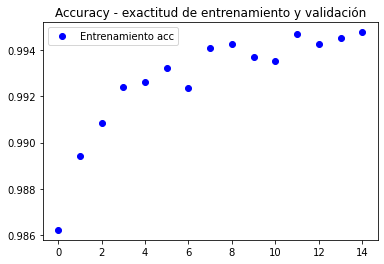

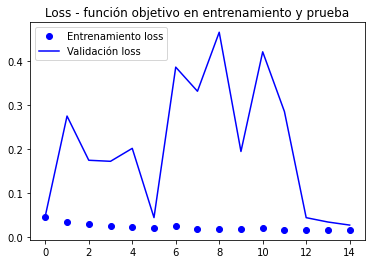

In [44]:
import matplotlib.pyplot as plt 

#1850

acc      = history_FULL.history['accuracy']
loss     = history_FULL.history['loss']
val_loss = history_FULL.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Entrenamiento acc')
plt.title('Accuracy - exactitud de entrenamiento y validación')
plt.legend() 

plt.figure() 

plt.plot(epochs, loss, 'bo', label='Entrenamiento loss')
plt.plot(epochs, val_loss, 'b', label='Validación loss')
plt.title('Loss - función objetivo en entrenamiento y prueba')
plt.legend()

plt.show()

(256, 256, 1)
(1, 256, 256, 3)
(256, 256, 1)


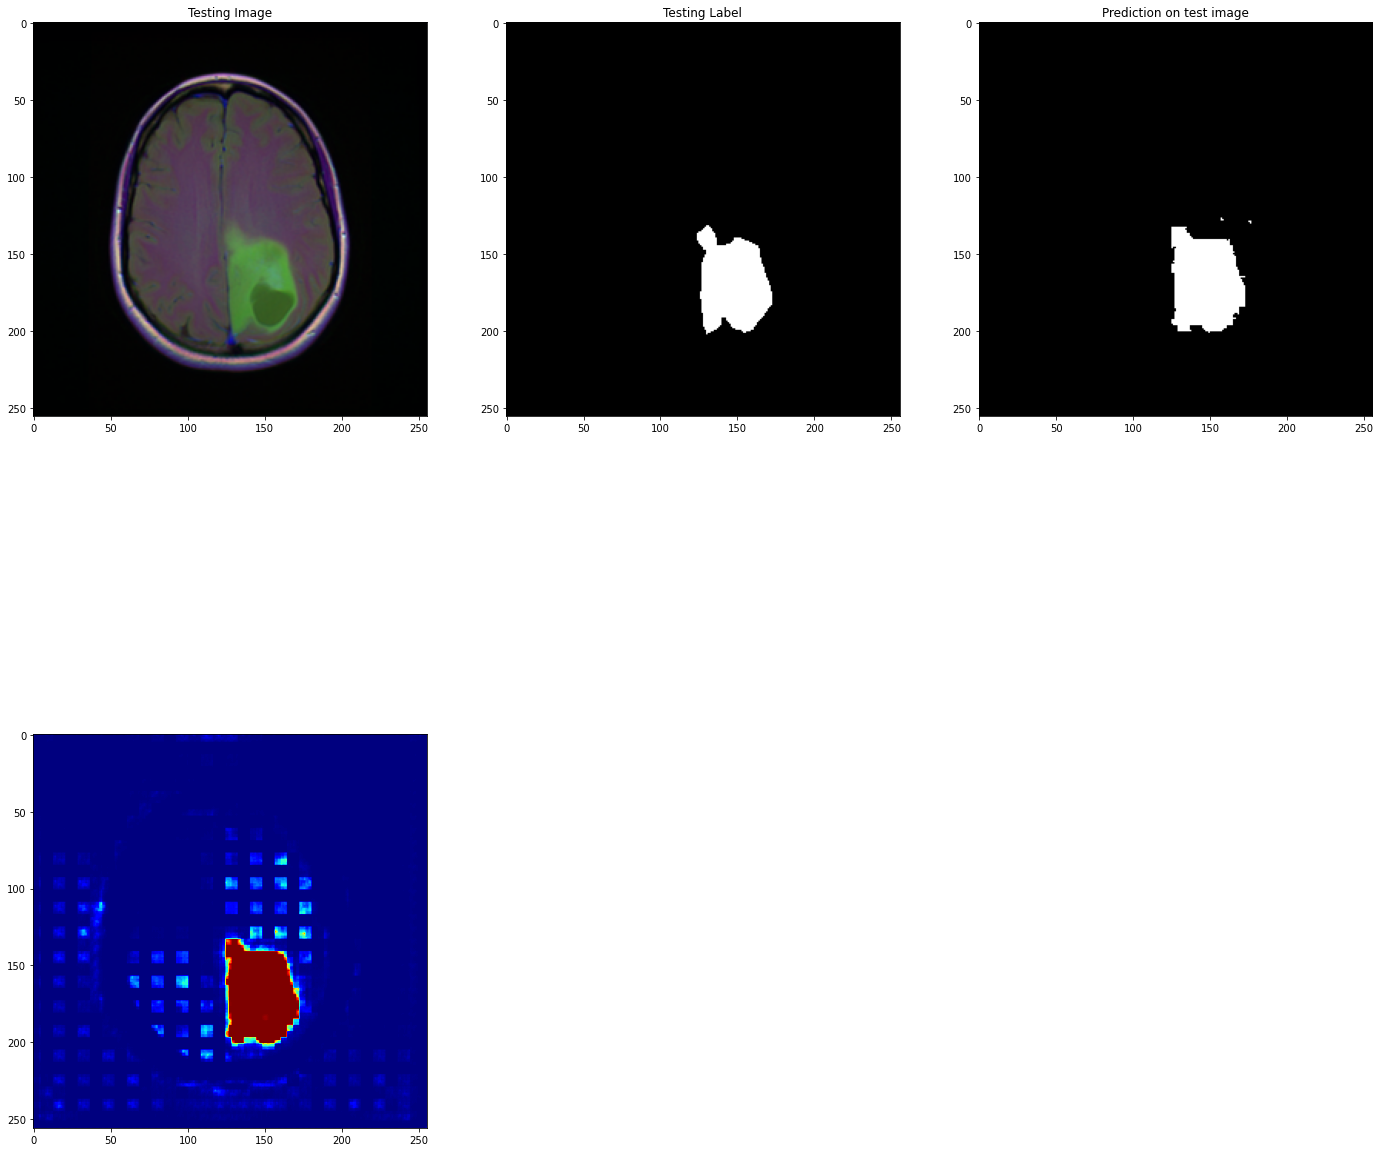

In [65]:
#making predictions
threshold = 0.5
#test_img_number = random.randint(0, num_vals-1)
x, y=test_datagen.__next__()
for i in range(0,1):
  test_img=x[i]
  ground_truth=y[i]
  print(ground_truth.shape)

# test_img = X_test[test_img_number]
# ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model_pix2pix_FULL.predict(test_img_input)[0,:,:,:] > 0.5).astype(np.uint8)
#prediction = (model.predict(test_img_input)[0,:,:,:])
print(prediction.shape)

plt.figure(figsize=(24, 24))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,:])
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction[:,:,0], cmap='gray')
plt.subplot(234)

img = np.array(model_pix2pix_FULL.predict(test_img_input)[0,:,:,:] )

plt.imshow(img, 'jet') 
plt.show()

Igual que antes suele dar valores mas grandes y se cuadricula el resultado. Aun que segmenta mejor los tumores.

El problema del "cuadriculado" que tiene los 3 casos puede que sea por el desencode que usamos que no coincide del todo con el encode que tiene la red base.